In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
DATA=pd.read_excel(r'C:\Users\W\Desktop\New folder\New Microsoft Excel Worksheet.xlsx')

In [3]:
DATA.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
DATA.shape

(855969, 73)

In [5]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
id                             855969 non-null int64
member_id                      855969 non-null int64
loan_amnt                      855969 non-null int64
funded_amnt                    855969 non-null int64
funded_amnt_inv                855969 non-null float64
term                           855969 non-null object
int_rate                       855969 non-null float64
installment                    855969 non-null float64
grade                          855969 non-null object
sub_grade                      855969 non-null object
emp_title                      806525 non-null object
emp_length                     812908 non-null object
home_ownership                 855969 non-null object
annual_inc                     855969 non-null float64
verification_status            855969 non-null object
issue_d                        855969 non-null datetime64[ns]
pymnt_plan       

In [6]:
DATA.index

RangeIndex(start=0, stop=855969, step=1)

In [12]:
DATA.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,...,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,...,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,...,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,...,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,...,75.000000,1.000000,2.000000,4485.500000,62.100000,2.380000e+04,0.000000,0.000000,2.000000,0.000000
75%,5.446311e+07,5.803559e+07,20000.000000,20000.000000,20000.000000,15.990000,571.560000,9.000000e+04,23.900000,0.000000,...,87.500000,2.000000,4.000000,7701.250000,75.300000,3.990000e+04,1.000000,2.000000,3.000000,0.000000
max,6.861687e+07,7.351969e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,223.300000,22.000000,43.000000,83047.000000,151.400000,9.999999e+06,15.000000,33.000000,32.000000,1.000000


In [13]:
DATA.describe(exclude=np.number)

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,desc,...,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint
count,855969,855969,855969,806525,812908,855969,855969,855969,855969,121812,...,855935,855969,855969,855969,855969,847107,602998,855919,855969,442
unique,2,7,35,290909,11,6,3,103,2,120335,...,60946,931,51,697,2,97,3,102,2,3
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,2015-10-01 00:00:00,n,,...,Debt consolidation,945xx,CA,2001-08-01 00:00:00,f,2016-01-01 00:00:00,2016-02-01 00:00:00,2016-01-01 00:00:00,INDIVIDUAL,Not Verified
freq,600221,247998,54958,12965,282090,429106,318178,48212,855964,231,...,398089,9466,125172,6433,442555,467510,534094,701687,855527,252
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-06-01 00:00:00,NaN,NaN,...,NaN,NaN,NaN,1944-01-01 00:00:00,NaN,2008-01-01 00:00:00,2016-01-01 00:00:00,2007-05-01 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-01 00:00:00,NaN,NaN,...,NaN,NaN,NaN,2012-11-01 00:00:00,NaN,2016-01-01 00:00:00,2016-03-01 00:00:00,2016-01-01 00:00:00,NaN,NaN


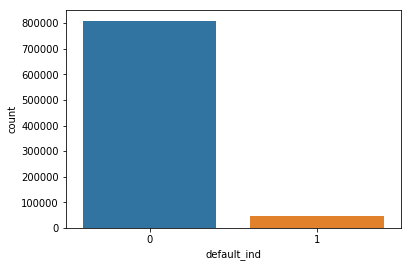

In [14]:
sns.countplot(x="default_ind",data=DATA)

In [8]:
DATA.default_ind.value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

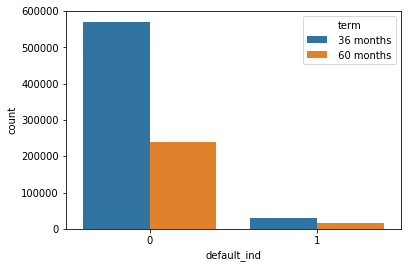

In [9]:
sns.countplot(x="default_ind",hue="term",data=DATA)

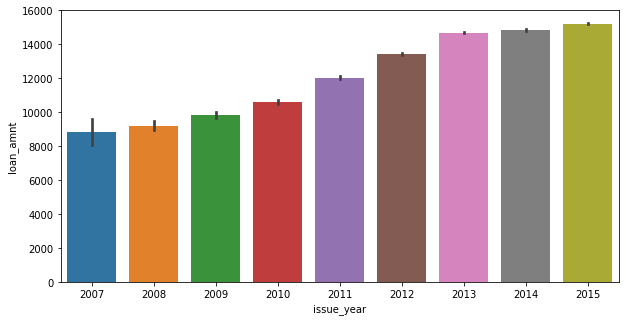

In [29]:
plt.figure(figsize=(10,5))
DATA['issue_year'] = DATA['issue_d'].dt.year
sns.barplot(x='issue_year',y='loan_amnt',data=DATA)

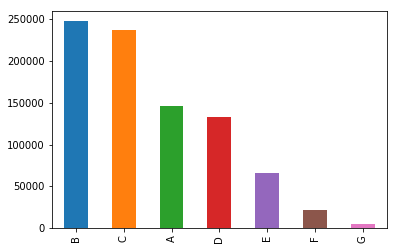

In [16]:
DATA.grade.value_counts().plot.bar()

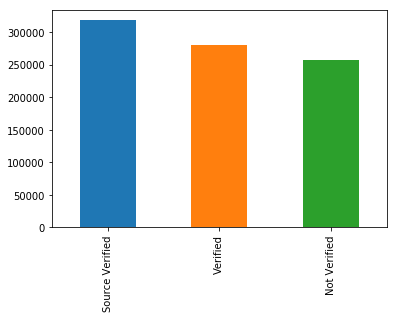

In [24]:
DATA.verification_status.value_counts().plot.bar()

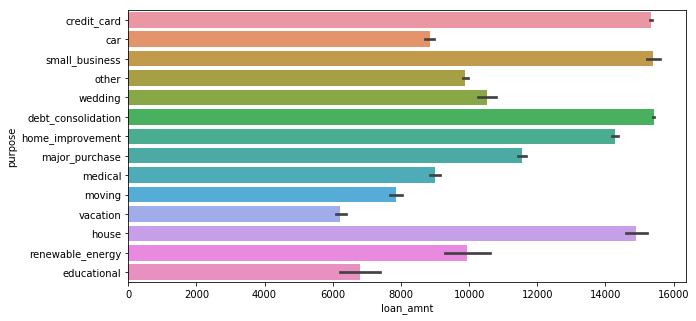

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(x="loan_amnt", y="purpose", data=DATA)

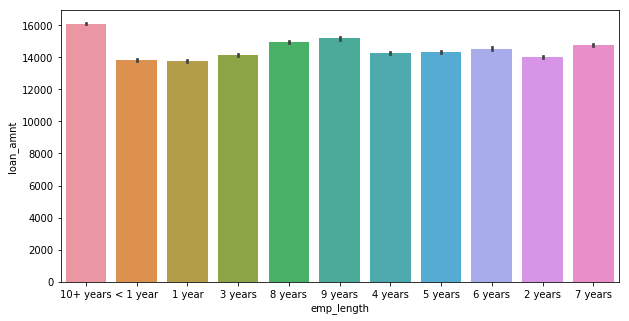

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(x="emp_length", y="loan_amnt", data=DATA)

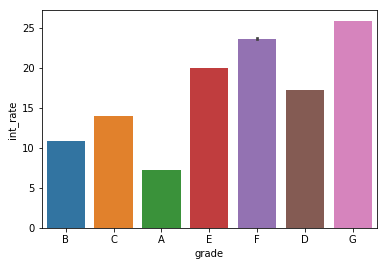

In [44]:
sns.barplot(x="grade", y="int_rate", data=DATA)

In [ ]:
sns.barplot(x="annual_inc", y="loan_amnt", data=DATA)

C:\Users\W\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Missing Value

In [46]:
#DATA.isnull()
DATA.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49444
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
desc                           734157
purpose                             0
title                              34
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_l

In [47]:
total= DATA.isnull().sum().sort_values(ascending=False)
percent= (DATA.isnull().sum()/DATA.isnull().count()).sort_values(ascending=False)*100
missing_data= pd.concat([total, percent],axis=1, keys=["Total", "Percent"])
missing_data.head(28)

,Total,Percent
dti_joint,855529,99.948596
verification_status_joint,855527,99.948363
annual_inc_joint,855527,99.948363
il_util,844360,98.643759
mths_since_rcnt_il,843035,98.488964
open_acc_6m,842681,98.447607
open_il_6m,842681,98.447607
open_il_12m,842681,98.447607
total_bal_il,842681,98.447607
open_il_24m,842681,98.447607


In [48]:
DATA1=DATA.drop(["mths_since_last_delinq","mths_since_last_major_derog","mths_since_last_record",
                "desc","total_cu_tl","inq_fi","all_util","max_bal_bc","open_rv_24m","open_rv_12m","open_il_12m",
                 "open_il_24m","open_il_6m","open_acc_6m","inq_last_12m","total_bal_il","mths_since_rcnt_il",
                 "il_util","annual_inc_joint","verification_status_joint","dti_joint"],axis=1)




In [49]:
DATA1=DATA1.drop(["id","member_id","zip_code","title","sub_grade","emp_title","pymnt_plan","purpose","addr_state",
                 "last_credit_pull_d","earliest_cr_line","last_pymnt_d","next_pymnt_d","initial_list_status","issue_d"],axis=1)

DATA1.shape

#DATA1.info ()                              


(855969, 38)

In [50]:
total= DATA1.isnull().sum().sort_values(ascending=False)
percent= (DATA1.isnull().sum()/DATA1.isnull().count()).sort_values(ascending=False)*100
missing_data= pd.concat([total, percent],axis=1, keys=["Total", "Percent"])
missing_data.head(25)

,Total,Percent
total_rev_hi_lim,67313,7.863953
tot_cur_bal,67313,7.863953
tot_coll_amt,67313,7.863953
emp_length,43061,5.030673
revol_util,446,0.052105
collections_12_mths_ex_med,56,0.006542
home_ownership,0,0.000000
open_acc,0,0.000000
inq_last_6mths,0,0.000000
delinq_2yrs,0,0.000000


Missing value Replacement

In [51]:
DATA1.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
emp_length                    43061
home_ownership                    0
annual_inc                        0
verification_status               0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      446
total_acc                         0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee     

In [52]:
#DATA1.tot_coll_amt.mean()
#DATA1.tot_cur_bal.mean()
DATA1.total_rev_hi_lim.mean()

32163.5745255219

In [53]:
DATA1['tot_coll_amt'].fillna(DATA1['tot_coll_amt'].mean(),inplace=True)

In [54]:
DATA1['tot_cur_bal'].fillna(DATA1['tot_cur_bal'].mean(),inplace=True)

In [55]:
DATA1['total_rev_hi_lim'].fillna(DATA1['total_rev_hi_lim'].mean(),inplace=True)

In [56]:
DATA1.isnull().sum()


loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
emp_length                    43061
home_ownership                    0
annual_inc                        0
verification_status               0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      446
total_acc                         0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee     

In [57]:
DATA2=DATA1.dropna()
DATA2.isnull().sum()
#DATA2.head()
#DATA2.shape

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
policy_code                   0
applicat

In [59]:
#DATA2.dtypes
DATA2.dtypes.value_counts()


float64    20
int64      12
object      6
dtype: int64

Data Type conversion

In [60]:
Term=pd.get_dummies(DATA2["term"],prefix="Term")
Term=pd.get_dummies(DATA2["term"],prefix="Term",drop_first=True)
Term.head(5)



,Term_ 60 months
0,0
1,1
2,0
3,0
4,1


In [61]:
DATA2.grade.value_counts()

B    235595
C    224557
A    138839
D    125298
E     63118
F     20340
G      4674
Name: grade, dtype: int64

In [62]:
DATA2['grade'] = DATA2['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})

C:\Users\W\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
DATA2.home_ownership.value_counts()

MORTGAGE    408883
RENT        327516
OWN          75838
OTHER          139
NONE            42
ANY              3
Name: home_ownership, dtype: int64

In [64]:
DATA2['home_ownership'] = DATA2['home_ownership'].map({'MORTGAGE':6,'RENT':5,'OWN':4,'OTHER':3
                                                                 ,'NONE':2,'ANY':1})

C:\Users\W\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [65]:
DATA2.emp_length.value_counts()

10+ years    281943
2 years       75943
< 1 year      67533
3 years       67355
1 year        54811
5 years       53786
4 years       50616
7 years       43174
8 years       42395
6 years       41423
9 years       33442
Name: emp_length, dtype: int64

In [66]:
DATA2["emp_length"] = DATA2["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0','s':''},
                                                            regex = True)


C:\Users\W\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [67]:
DATA2.emp_length.value_counts()

#DATA2['emp_length']= pd.to_numeric(DATA2['emp_length'],errors = 'coerce')

10    281943
1     122344
2      75943
3      67355
5      53786
4      50616
7      43174
8      42395
6      41423
9      33442
Name: emp_length, dtype: int64

In [68]:
DATA2.verification_status.value_counts()

Source Verified    310016
Not Verified       252916
Verified           249489
Name: verification_status, dtype: int64

In [69]:
Verification_status=pd.get_dummies(DATA2["verification_status"],prefix="Verf")
Verification_status=pd.get_dummies(DATA2["verification_status"],prefix="Verf",drop_first=True)
Verification_status.head(5)


,Verf_Source Verified,Verf_Verified
0,0,1
1,1,0
2,0,0
3,1,0
4,1,0


In [70]:
DATA2.application_type.value_counts()

INDIVIDUAL    812035
JOINT            386
Name: application_type, dtype: int64

In [71]:
Application_type=pd.get_dummies(DATA2["application_type"],prefix="Appl")
Application_type=pd.get_dummies(DATA2["application_type"],prefix="Appl",drop_first=True)
Application_type.head(5)


,Appl_JOINT
0,0
1,0
2,0
3,0
4,0


In [72]:
DATA3=pd.concat([DATA2,Application_type,Verification_status,Term],axis=1)

In [74]:
DATA3=DATA3.drop(["application_type","verification_status","term"],axis=1)

In [75]:
DATA3=DATA3.astype(int)
DATA3.dtypes

loan_amnt                     int32
funded_amnt                   int32
funded_amnt_inv               int32
int_rate                      int32
installment                   int32
grade                         int32
emp_length                    int32
home_ownership                int32
annual_inc                    int32
dti                           int32
delinq_2yrs                   int32
inq_last_6mths                int32
open_acc                      int32
pub_rec                       int32
revol_bal                     int32
revol_util                    int32
total_acc                     int32
out_prncp                     int32
out_prncp_inv                 int32
total_pymnt                   int32
total_pymnt_inv               int32
total_rec_prncp               int32
total_rec_int                 int32
total_rec_late_fee            int32
recoveries                    int32
collection_recovery_fee       int32
last_pymnt_amnt               int32
collections_12_mths_ex_med  

Unique Value

In [76]:
unique=DATA3.nunique()
unique=unique[unique.values==1]
unique

policy_code    1
dtype: int64

In [77]:
DATA3=DATA3.drop("policy_code",axis=1)

#Correlation

In [81]:
Corr=CorrM.corr()
Corr

,loan_amnt,funded_amnt,funded_amnt_inv,installment,int_rate,annual_inc,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,out_prncp,out_prncp_inv
loan_amnt,1.000000,0.999241,0.997524,0.944028,0.145813,0.327543,0.046228,0.475724,0.476465,0.391727,0.637013,0.637014
funded_amnt,0.999241,1.000000,0.998438,0.945091,0.145967,0.327336,0.047070,0.474376,0.475289,0.390495,0.638978,0.638980
funded_amnt_inv,0.997524,0.998438,1.000000,0.943274,0.146164,0.326724,0.048978,0.470599,0.474693,0.386754,0.641336,0.641347
installment,0.944028,0.945091,0.943274,1.000000,0.132534,0.321796,0.030855,0.517567,0.518303,0.452376,0.535695,0.535689
int_rate,0.145813,0.145967,0.146164,0.132534,1.000000,-0.073595,0.160239,0.179985,0.181008,0.064705,0.030287,0.030145
annual_inc,0.327543,0.327336,0.326724,0.321796,-0.073595,1.000000,-0.178470,0.156514,0.156605,0.146147,0.207223,0.207264
dti,0.046228,0.047070,0.048978,0.030855,0.160239,-0.178470,1.000000,-0.080995,-0.078944,-0.103194,0.122311,0.122234
total_pymnt,0.475724,0.474376,0.470599,0.517567,0.179985,0.156514,-0.080995,1.000000,0.998087,0.970441,-0.296421,-0.296413
total_pymnt_inv,0.476465,0.475289,0.474693,0.518303,0.181008,0.156605,-0.078944,0.998087,1.000000,0.968421,-0.293680,-0.293666
total_rec_prncp,0.391727,0.390495,0.386754,0.452376,0.064705,0.146147,-0.103194,0.970441,0.968421,1.000000,-0.377663,-0.377658


In [82]:
CorrM=DATA3.filter(["loan_amnt","funded_amnt",'funded_amnt_inv','installment','int_rate','annual_inc','dti','total_pymnt',
                   'total_pymnt_inv','total_rec_prncp',"out_prncp","out_prncp_inv"])

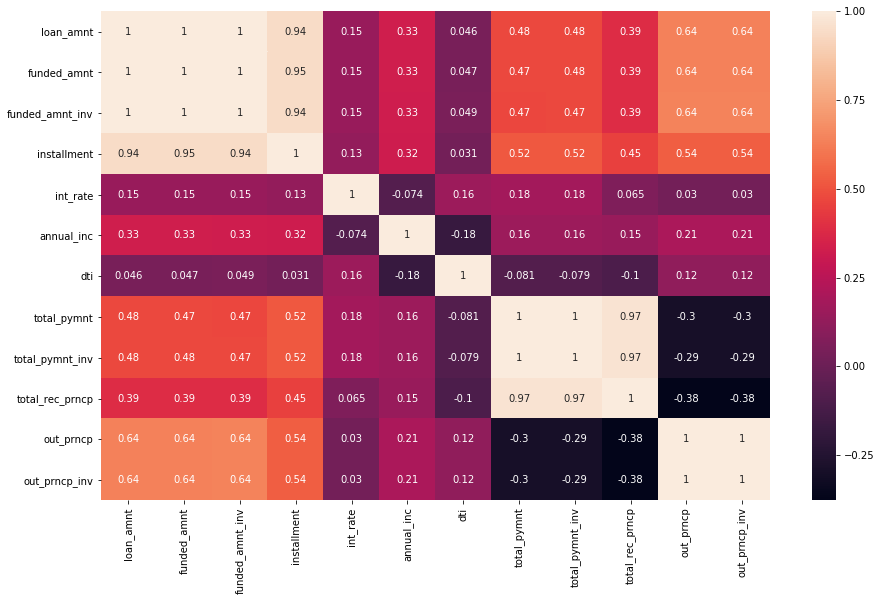

In [83]:
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(Corr, 
            xticklabels=Corr.columns.values,
            yticklabels=Corr.columns.values,annot= True)
plt.show()


In [84]:
DATA3=DATA3.drop(["funded_amnt",'funded_amnt_inv',"total_pymnt_inv","out_prncp_inv"],axis=1)

Outliers

In [85]:
numerical = DATA3._get_numeric_data().columns


Index(['loan_amnt', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'default_ind',
       'issue_year', 'Appl_JOINT', 'Verf_Source Verified', 'Verf_Verified',
       'Term_ 60 months'],
      dtype='object')


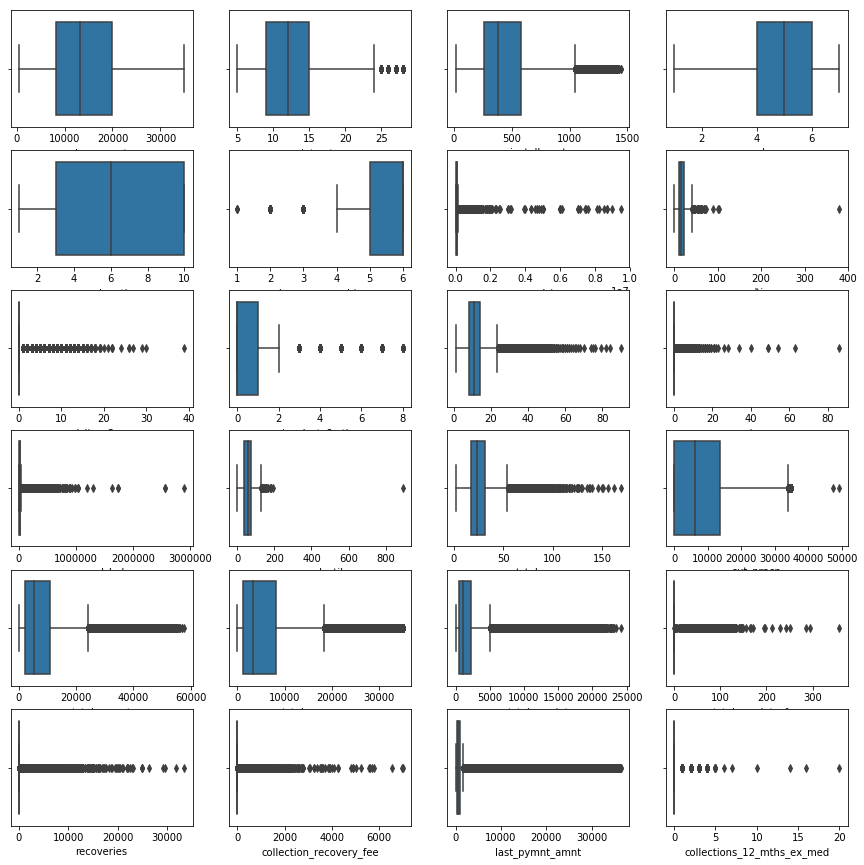

In [86]:
num_of_rows = 6
num_of_cols = 4
fig, ax = plt.subplots(num_of_rows, num_of_cols, figsize=(15,15))
print(numerical)
i=0;j=0;k=0;
while i<num_of_rows:
    while j<num_of_cols:
        sns.boxplot(DATA3[numerical[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.show()

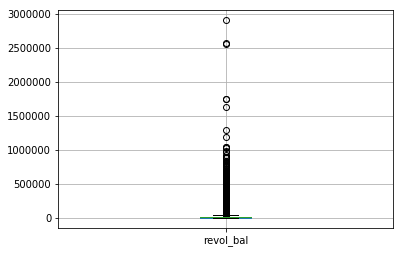

In [87]:
DATA3.boxplot(column='revol_bal')
plt.show()

In [88]:
q1 = DATA3["revol_bal"].quantile(0.25)
#         print(i ,"q1", q1)
q3 = DATA3["revol_bal"].quantile(0.75)
#         print(i, "q3", q3)
IQR = q3-q1
#         print(i, "IQR", IQR)
minimum = q1 - 1.5 * IQR
maximum = q3 + 1.5 * IQR
DATA3.loc[(DATA3["revol_bal"] <= minimum), "revol_bal"] = minimum
DATA3.loc[(DATA3["revol_bal"] >= maximum), "revol_bal"] = maximum  


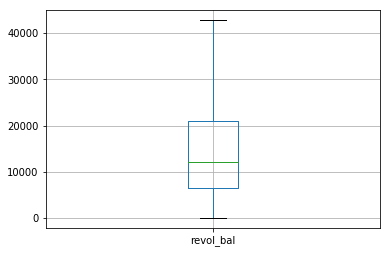

In [89]:
DATA3.boxplot(column='revol_bal')
plt.show()

In [90]:
q1 = DATA3["dti"].quantile(0.25)
#         print(i ,"q1", q1)
q3 = DATA3["dti"].quantile(0.75)
#         print(i, "q3", q3)
IQR = q3-q1
#         print(i, "IQR", IQR)
minimum = q1 - 1.5 * IQR
maximum = q3 + 1.5 * IQR
DATA3.loc[(DATA3["dti"] <= minimum), "dti"] = minimum
DATA3.loc[(DATA3["dti"] >= maximum), "dti"] = maximum  


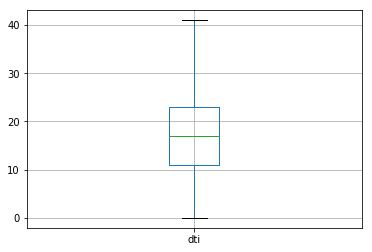

In [91]:
DATA3.boxplot(column='dti')
plt.show()

In [92]:
q1 = DATA3["delinq_2yrs"].quantile(0.25)
#         print(i ,"q1", q1)
q3 = DATA3["delinq_2yrs"].quantile(0.75)
#         print(i, "q3", q3)
IQR = q3-q1
#         print(i, "IQR", IQR)
minimum = q1 - 1.5 * IQR
maximum = q3 + 1.5 * IQR
DATA3.loc[(DATA3["delinq_2yrs"] <= minimum), "delinq_2yrs"] = minimum
DATA3.loc[(DATA3["delinq_2yrs"] >= maximum), "delinq_2yrs"] = maximum  


In [93]:
q1 = DATA3["pub_rec"].quantile(0.25)
#         print(i ,"q1", q1)
q3 = DATA3["pub_rec"].quantile(0.75)
#         print(i, "q3", q3)
IQR = q3-q1
#         print(i, "IQR", IQR)
minimum = q1 - 1.5 * IQR
maximum = q3 + 1.5 * IQR
DATA3.loc[(DATA3["pub_rec"] <= minimum), "pub_rec"] = minimum
DATA3.loc[(DATA3["pub_rec"] >= maximum), "pub_rec"] = maximum  


In [94]:
q1 = DATA3["revol_util"].quantile(0.25)
#         print(i ,"q1", q1)
q3 = DATA3["revol_util"].quantile(0.75)
#         print(i, "q3", q3)
IQR = q3-q1
#         print(i, "IQR", IQR)
minimum = q1 - 1.5 * IQR
maximum = q3 + 1.5 * IQR
DATA3.loc[(DATA3["revol_util"] <= minimum), "revol_util"] = minimum
DATA3.loc[(DATA3["revol_util"] >= maximum), "revol_util"] = maximum  


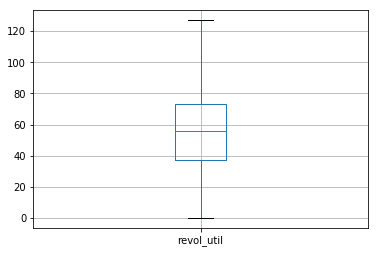

In [95]:
DATA3.boxplot(column='revol_util')
plt.show()

In [96]:
q1 = DATA3["out_prncp"].quantile(0.25)
#         print(i ,"q1", q1)
q3 = DATA3["out_prncp"].quantile(0.75)
#         print(i, "q3", q3)
IQR = q3-q1
#         print(i, "IQR", IQR)
minimum = q1 - 1.5 * IQR
maximum = q3 + 1.5 * IQR
DATA3.loc[(DATA3["out_prncp"] <= minimum), "out_prncp"] = minimum
DATA3.loc[(DATA3["out_prncp"] >= maximum), "out_prncp"] = maximum  


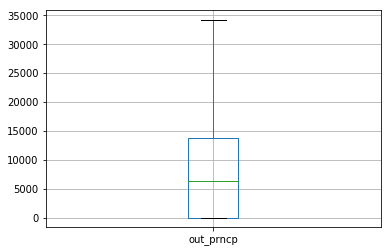

In [97]:
DATA3.boxplot(column='out_prncp')
plt.show()

In [106]:
DATA3=DATA3.astype(int)


Data Partition

In [98]:
X=DATA3.drop("default_ind",axis=1)
Y=DATA3["default_ind"]



In [99]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X)

X=scaler.transform(X)

print(X)

C:\Users\W\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\W\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  import sys


[[-1.17364265 -0.59955659 -1.13763801 ... -0.78553416  1.50211183
  -0.66156364]
 [-1.46988333  0.54799143 -1.55948952 ...  1.27301911 -0.66572939
   1.51157037]
 [-1.48173295  0.54799143 -1.45709838 ... -0.78553416 -0.66572939
  -0.66156364]
 ...
 [-0.2256725   0.54799143 -0.50690856 ... -0.78553416  1.50211183
   1.51157037]
 [-0.34416877  1.46602985 -0.50281292 ...  1.27301911 -0.66572939
   1.51157037]
 [ 0.60380139 -0.37004699  0.91837616 ... -0.78553416  1.50211183
  -0.66156364]]


In [100]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)


In [101]:
print("Train and test sizes, respectively:", len(X_train), len(Y_train), "|", len(X_test), len(Y_test))


Train and test sizes, respectively: 568694 568694 | 243727 243727


In [102]:
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression()

#fitting training data to model

classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)

Y_pred

#print(list(zip(Y_test,Y_pred)))

#print(classifier.coef_)
#print(classifier.intercept_)

C:\Users\W\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 1, ..., 0, 0, 0])

In [103]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print()
print("classification_report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of model: ",acc)

[[230761     52]
 [   696  12218]]

classification_report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    230813
           1       1.00      0.95      0.97     12914

   micro avg       1.00      1.00      1.00    243727
   macro avg       1.00      0.97      0.98    243727
weighted avg       1.00      1.00      1.00    243727

Accuracy of model:  0.9969309924628785


Cross Validation

In [104]:
classifier=(LogisticRegression())

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10)
print(kfold_cv)


from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,y=Y_train, cv=kfold_cv)   #cross_val_score is for getting accuracy 
print(kfold_cv_result)                                                                   #for each fold
#finding the mean
print("Mean: ",kfold_cv_result.mean())

KFold(n_splits=10, random_state=None, shuffle=False)


C:\Users\W\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\W\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\W\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\W\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\W\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

[0.99679972 0.99665905 0.99607878 0.99701073 0.9965359  0.99637764
 0.99662382 0.99697551 0.99660624 0.99637764]
Mean:  0.996604500609703


Balancing

In [109]:
Data1=DATA3[DATA3.default_ind==1]
Data1.default_ind.value_counts()

1    43821
Name: default_ind, dtype: int64

In [111]:
Data2=DATA3.iloc[0:50000,:]
Data2.default_ind.value_counts()

0    43640
1     6360
Name: default_ind, dtype: int64

In [112]:
Data2.shape


(50000, 34)

In [113]:
Data3=pd.concat([Data2,Data1])
Data3.shape
#Data3.head(10)
Data3.default_ind.value_counts()
#Data3.shape

1    50181
0    43640
Name: default_ind, dtype: int64

Partition

In [114]:
X = Data3.copy()
Y = X.pop('default_ind')

Y.shape
X.shape

(93821, 33)

In [115]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)


In [116]:
print("Train and test sizes, respectively:", len(X_train), len(Y_train), "|", len(X_test), len(Y_test))


Train and test sizes, respectively: 65674 65674 | 28147 28147


In [117]:
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression()

#fitting training data to model

classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)

Y_pred


C:\Users\W\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\W\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([1, 0, 1, ..., 1, 1, 0])

In [118]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print()
print("classification_report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of model: ",acc)

[[13040    73]
 [  316 14718]]

classification_report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     13113
           1       1.00      0.98      0.99     15034

   micro avg       0.99      0.99      0.99     28147
   macro avg       0.99      0.99      0.99     28147
weighted avg       0.99      0.99      0.99     28147

Accuracy of model:  0.9861796994351085


Feature Importance

In [119]:
colname=X.columns[:]

from sklearn.feature_selection import RFE
rfe = RFE(classifier, 10)
model_rfe = rfe.fit(X_train, Y_train)
print("Num Features: ",model_rfe.n_features_)
print("Selected Features: ") 
print(list(zip(colname, model_rfe.support_)))    #to get rejected or not
print("Feature Ranking: ", model_rfe.ranking_)   #ranking list 1 for true and no are the order in which column deleted eg 7 for first deletion


C:\Users\W\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\W\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\W\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\W\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\W\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWar

Num Features:  10
Selected Features: 
[('loan_amnt', False), ('int_rate', True), ('installment', True), ('grade', False), ('emp_length', True), ('home_ownership', False), ('annual_inc', False), ('dti', False), ('delinq_2yrs', False), ('inq_last_6mths', False), ('open_acc', True), ('pub_rec', False), ('revol_bal', False), ('revol_util', False), ('total_acc', False), ('out_prncp', False), ('total_pymnt', True), ('total_rec_prncp', True), ('total_rec_int', True), ('total_rec_late_fee', True), ('recoveries', True), ('collection_recovery_fee', True), ('last_pymnt_amnt', False), ('collections_12_mths_ex_med', False), ('acc_now_delinq', False), ('tot_coll_amt', False), ('tot_cur_bal', False), ('total_rev_hi_lim', False), ('issue_year', False), ('Appl_JOINT', False), ('Verf_Source Verified', False), ('Verf_Verified', False), ('Term_ 60 months', False)]
Feature Ranking:  [ 8  1  1 11  1 15 18  2 23  9  1 22 17  4  3  6  1  1  1  1  1  1 13 16
 14 19 21 20  7 24 10 12  5]


In [120]:
Y_pred=model_rfe.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print()
print("classification_report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of model: ",acc)

[[12686   427]
 [  770 14264]]

classification_report: 
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     13113
           1       0.97      0.95      0.96     15034

   micro avg       0.96      0.96      0.96     28147
   macro avg       0.96      0.96      0.96     28147
weighted avg       0.96      0.96      0.96     28147

Accuracy of model:  0.9574732653568764


AUC ROC

In [121]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score


In [122]:
y_pred = classifier.predict(X_test)

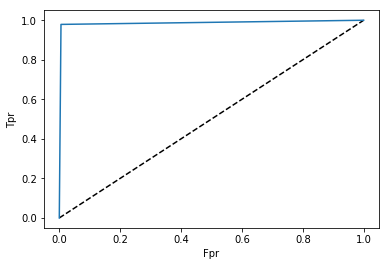

In [123]:
fpr,tpr,threshold = roc_curve(Y_test,y_pred)
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'logistic regression')


In [124]:
print(roc_auc_score(Y_test,y_pred))

0.9867069909339233


In [125]:
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(100,random_state=10)

#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)

In [126]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[13099    14]
 [   90 14944]]
0.996305112445376
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     13113
           1       1.00      0.99      1.00     15034

   micro avg       1.00      1.00      1.00     28147
   macro avg       1.00      1.00      1.00     28147
weighted avg       1.00      1.00      1.00     28147

